In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings


In [86]:
import pandas as pd

df = pd.read_csv(r"D:\My_Project\Analyse\Sales_data\data\raw\sales_data.csv")
df.head()




,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [87]:
print(f"Dataset shepe: {df.shape}")

Dataset shepe: (51290, 21)


In [88]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [90]:
df.describe()


,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [91]:
print(df.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [92]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce', dayfirst=True)



In [93]:
df['sales'] = df['sales'].astype(str).str.replace(',' , '').astype(float)

In [94]:
print(df.dtypes)

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object


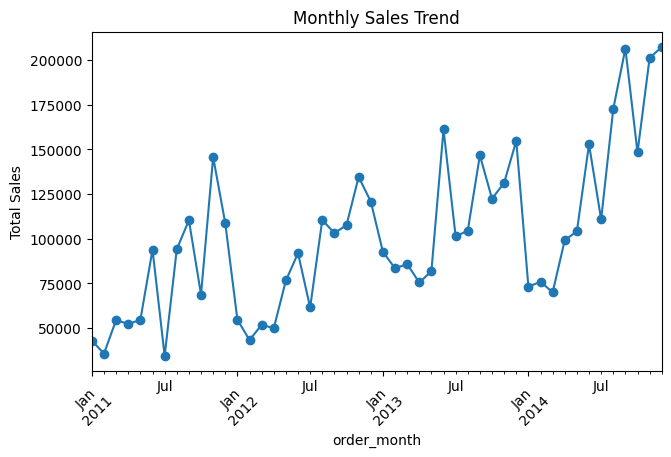

In [95]:
plt.figure(figsize=(25, 15)) 

plt.subplot(3, 3, 1)
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['sales'].sum()
monthly_sales.plot(kind='line', marker='o')

plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Monthly Sales Trend.png")
plt.show()      


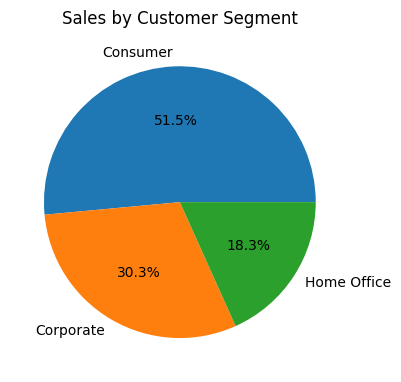

In [96]:
plt.figure(figsize=(25, 15)) 

plt.subplot(3,3,2)
segment_sales = df.groupby('segment')['sales'].sum()
plt.pie(segment_sales.values,labels=segment_sales.index, autopct='%1.1f%%')
plt.title('Sales by Customer Segment')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Sales by Customer Segment")
plt.show() 


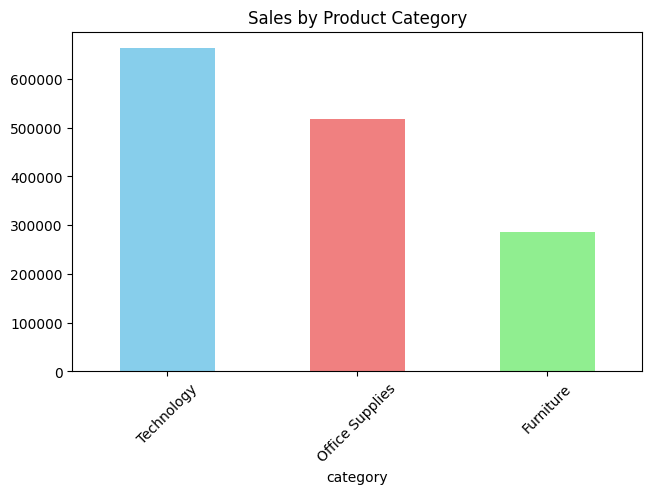

In [97]:
plt.figure(figsize=(25, 15)) 

plt.subplot(3,3,4)
category_sales=df.groupby('category')['profit'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color=['skyblue','lightcoral','lightgreen'])
plt.title('Sales by Product Category')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Sales by Product Category")
plt.show()

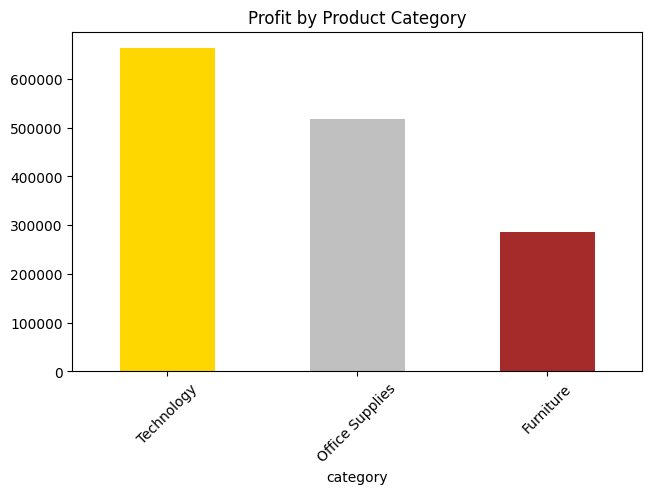

In [98]:
plt.figure(figsize=(25, 15)) 

plt.subplot(3, 3, 5)
category_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Profit by Product Category')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Profit by Product Category")
plt.show()


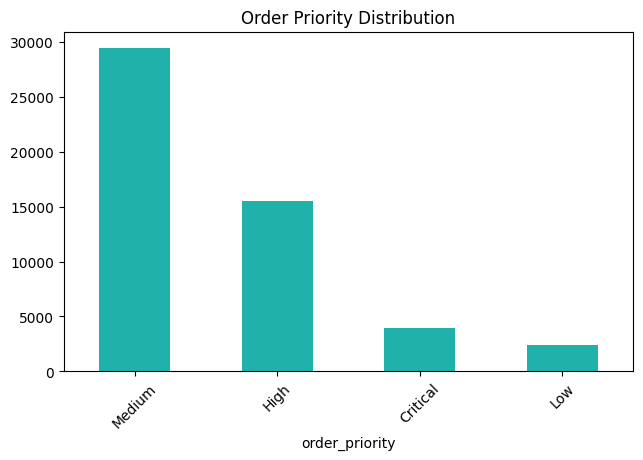

In [99]:
plt.figure(figsize=(25, 15))

plt.subplot(3,3,6)
shipping_count =df['order_priority'].value_counts()
shipping_count.plot(kind='bar' , color='lightseagreen')
plt.title('Order Priority Distribution')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Order Priority Distribution")
plt.show()

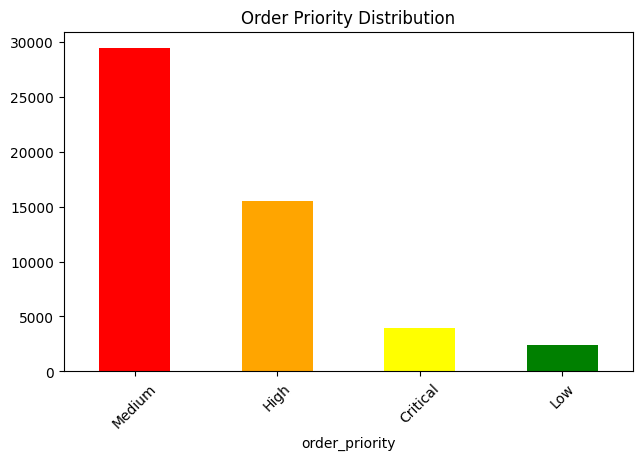

In [100]:
plt.figure(figsize=(25, 15))

plt.subplot(3, 3, 7)
priority_counts = df['order_priority'].value_counts()
priority_counts.plot(kind='bar' \
'', color=['red', 'orange', 'yellow', 'green'])
plt.title('Order Priority Distribution')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Order Priority Distribution")
plt.show()

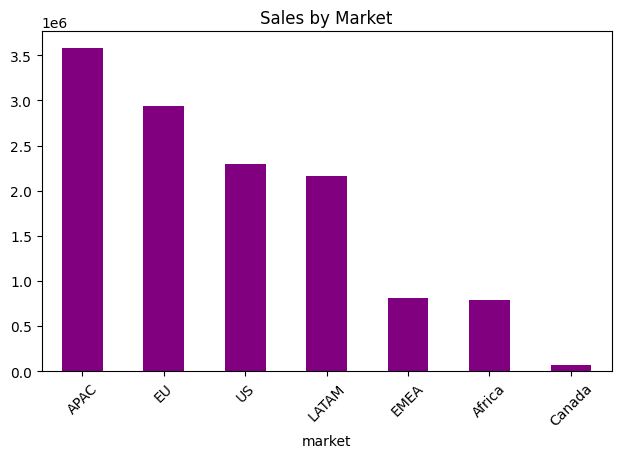

In [101]:
plt.figure(figsize=(25, 15))

plt.subplot(3, 3, 8)
market_sales = df.groupby('market')['sales'].sum().sort_values(ascending=False)
market_sales.plot(kind='bar', color='purple')
plt.title('Sales by Market')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Sales by Market")
plt.show()

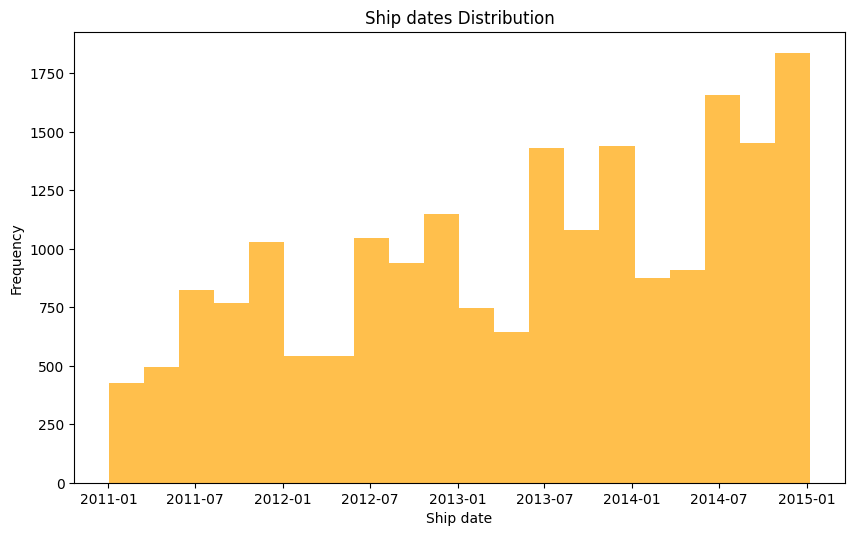

In [102]:
plt.figure(figsize=(25, 15))

plt.subplot(3, 3, 9)
plt.hist(df['ship_date'].dropna(), bins=20, color='orange', alpha=0.7)
plt.title('Ship dates Distribution')
plt.xlabel('Ship date')
plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Ship_dates_Distribution.png")
plt.show()


In [103]:
top_products_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Profit:")
print(top_products_profit)

Top 10 Products by Profit:
product_name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: profit, dtype: float64


In [104]:
bottom_products_profit=df.groupby('product_name')['profit'].sum().sort_values().head(10)
print("Buttom_products_profit:")
print(bottom_products_profit)

Buttom_products_profit:
product_name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: profit, dtype: float64


In [105]:
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Sales:")
print(top_customers)

Top 10 Customers by Sales:
customer_name
Tom Ashbrook          40489.0
Tamara Chand          37453.0
Greg Tran             35552.0
Christopher Conant    35187.0
Sean Miller           35170.0
Bart Watters          32315.0
Natalie Fritzler      31778.0
Fred Hopkins          30404.0
Jane Waco             30288.0
Hunter Lopez          30246.0
Name: sales, dtype: float64


In [106]:
top_countries=df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Country by Sales:")
print(top_countries)

Top 10 Country by Sales:
country
United States     2297354.0
Australia          925257.0
France             858930.0
China              700591.0
Germany            628857.0
Mexico             622620.0
India              589664.0
United Kingdom     528570.0
Indonesia          404887.0
Brazil             361098.0
Name: sales, dtype: float64


In [107]:
top_states=df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 States by Sales:")


Top 10 States by Sales:


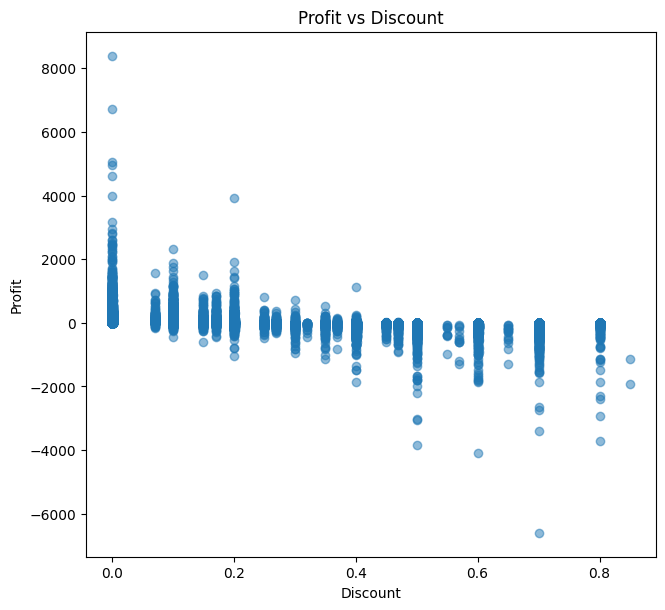

In [108]:
plt.figure(figsize=(25, 15))

plt.subplot(2,3,1)
plt.scatter(df['discount'],df['profit'],alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs Discount')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Profit vs Discount.png")
plt.show()

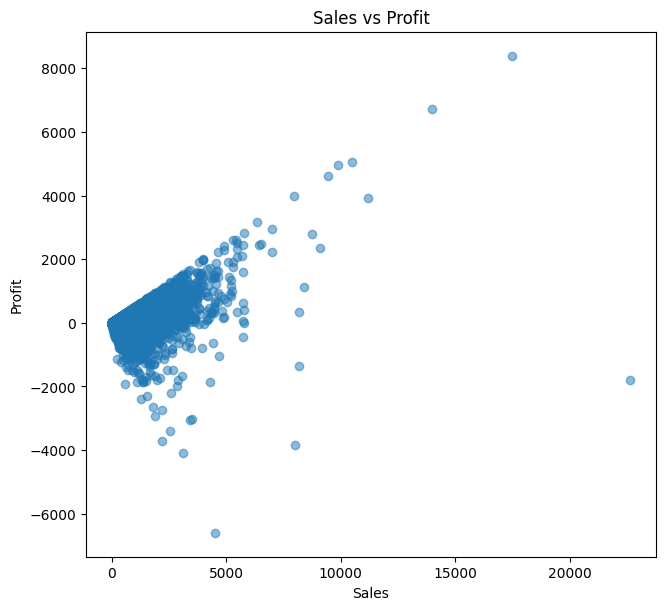

In [109]:
plt.figure(figsize=(25, 15))

plt.subplot(2,3,1)
plt.scatter(df['sales'],df['profit'],alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Sales vs Profit.png")
plt.show()

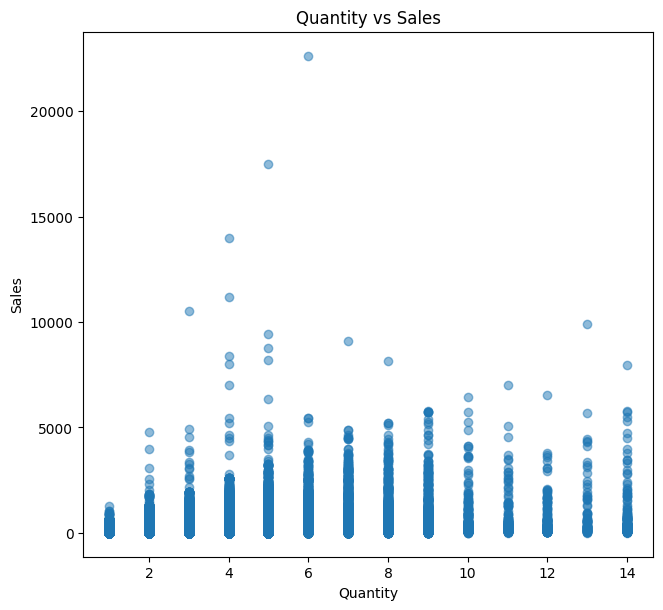

In [110]:
plt.figure(figsize=(25, 15))


plt.subplot(2, 3, 3)
plt.scatter(df['quantity'], df['sales'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Quantity vs Sales')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Quantity vs Sales.png")
plt.show()

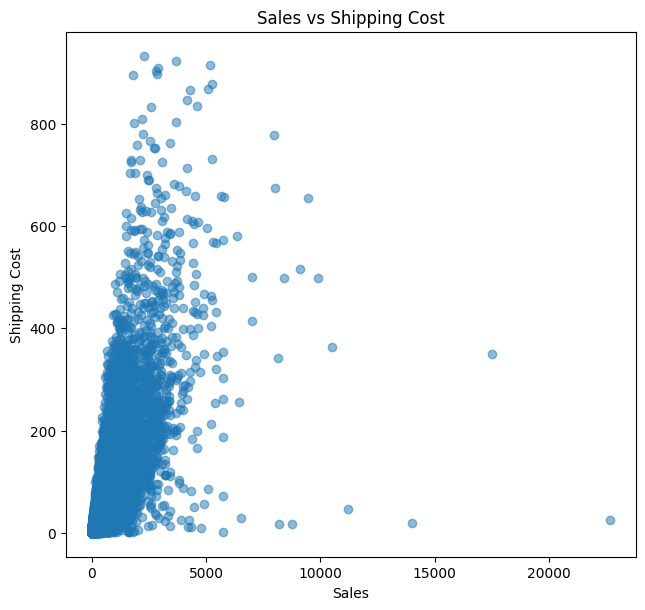

In [111]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 4)
plt.scatter(df['sales'], df['shipping_cost'], alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Shipping Cost')
plt.title('Sales vs Shipping Cost')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Sales vs Shipping Cost.png")
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


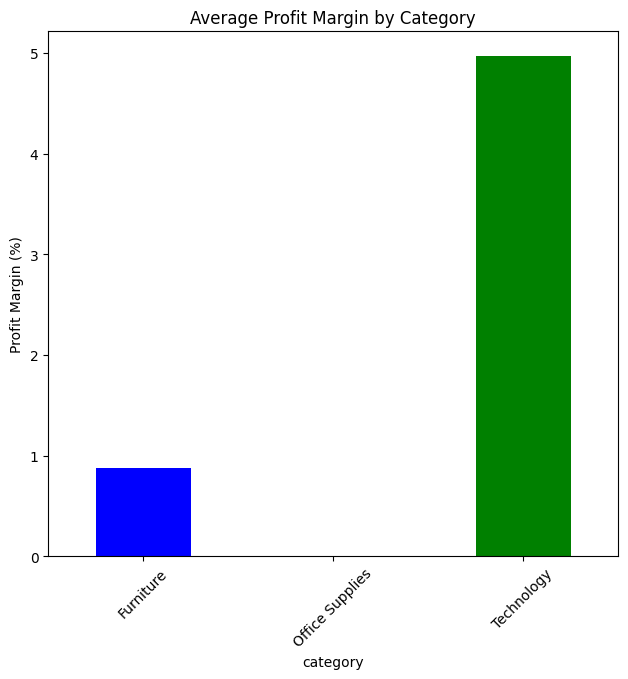

In [112]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 3, 5)
df['profit_margin'] = (df['profit'] / df['sales']) * 100
category_margin = df.groupby('category')['profit_margin'].mean()
category_margin.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Average Profit Margin by Category')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Average Profit Margin by Category.png")
plt.show()

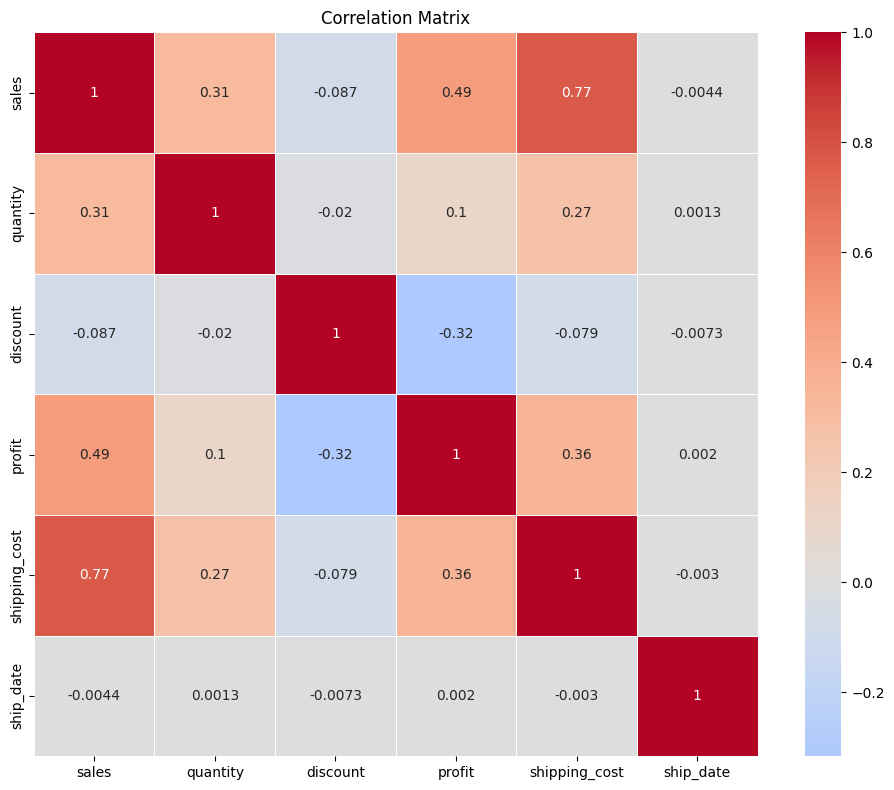

In [113]:
numeric_columns = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'ship_date']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [114]:
monthly_analysis = df.groupby('order_month').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'})



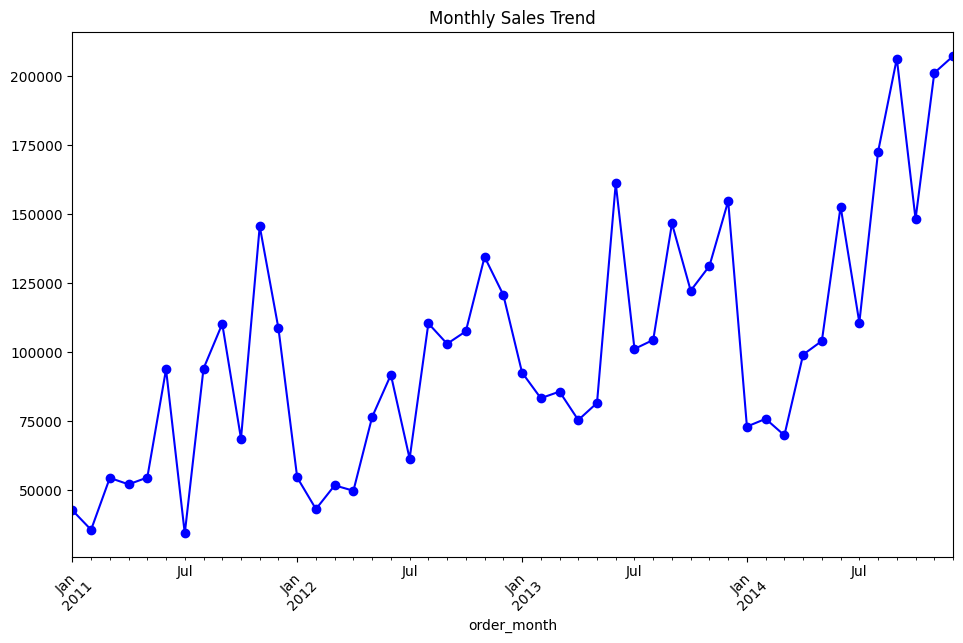

In [115]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
monthly_analysis['sales'].plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Monthly Sales Trend.png")
plt.show()

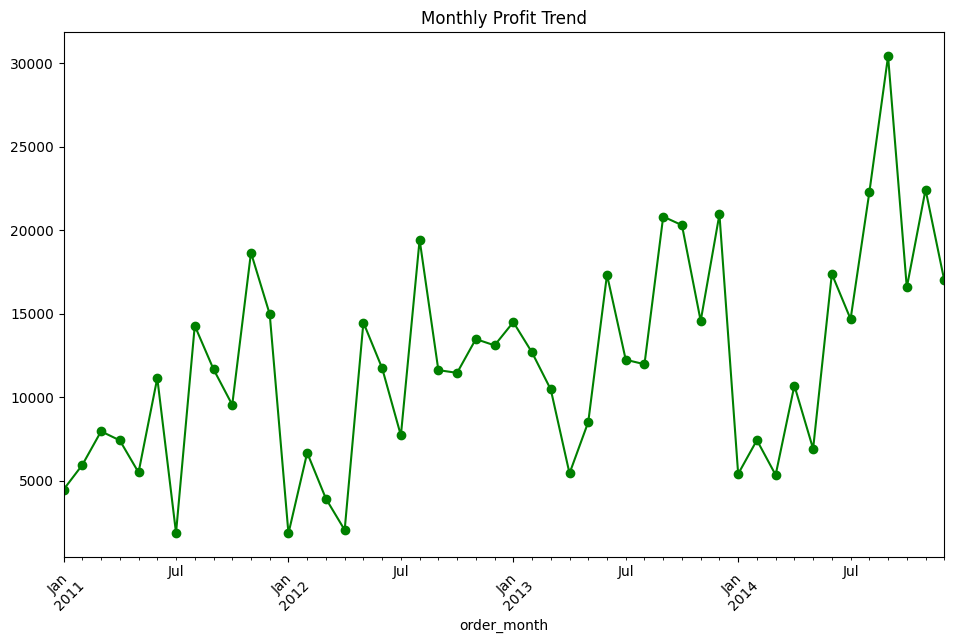

In [116]:
plt.figure(figsize=(25, 15))


plt.subplot(2, 2, 2)
monthly_analysis['profit'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Profit Trend')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Monthly Profit Trend.png")
plt.show()

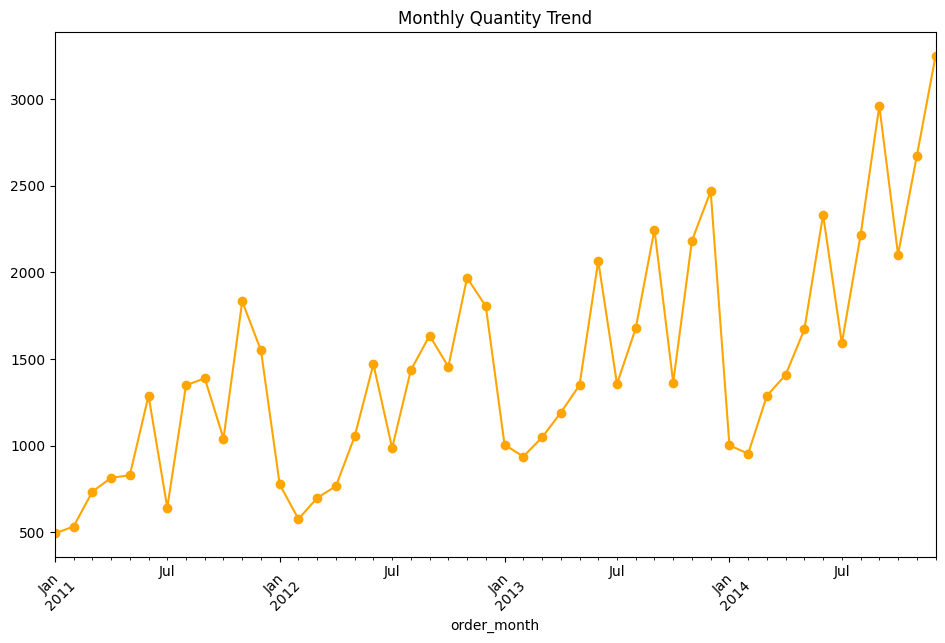

In [117]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 3)
monthly_analysis['quantity'].plot(kind='line', marker='o', color='orange')
plt.title('Monthly Quantity Trend')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Monthly Quantity Trend.png")
plt.show()

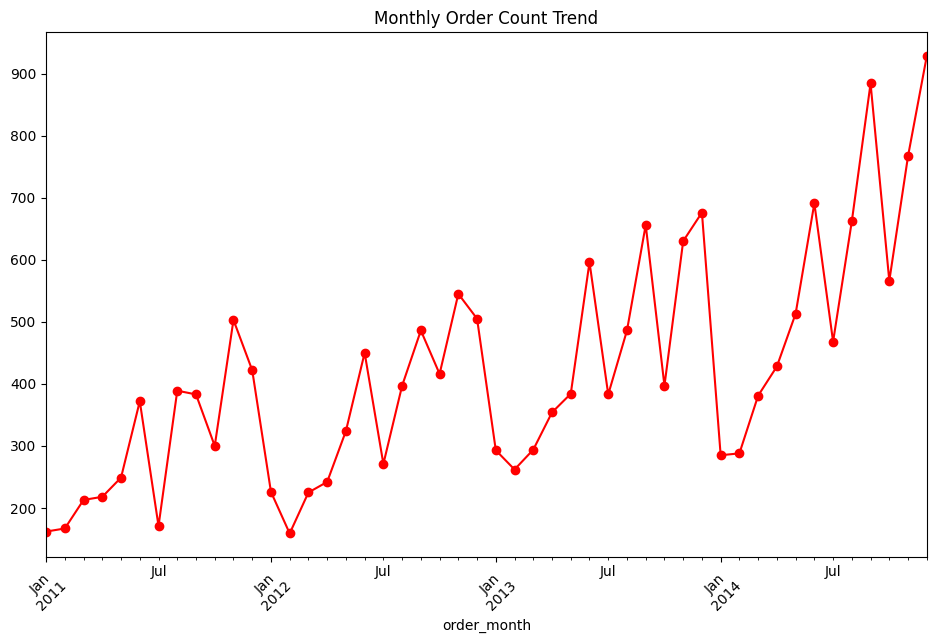

In [118]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 4)
monthly_analysis['order_count'].plot(kind='line', marker='o', color='red')
plt.title('Monthly Order Count Trend')
plt.xticks(rotation=45)

plt.savefig(r"D:\My_Project\Analyse\Sales_data\figures\Monthly Order Count Trend.png")
plt.show()

In [119]:

print("\n=== KEY PERFORMANCE INDICATORS ===")
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_sales / total_orders
avg_profit_margin = (total_profit / total_sales) * 100
avg_shipping_days = df['ship_date'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Average Shipping Days: {avg_shipping_days:.2f}")


=== KEY PERFORMANCE INDICATORS ===
Total Sales: $12,642,905.00
Total Profit: $1,469,034.82
Total Orders: 25035
Average Order Value: $505.01
Average Profit Margin: 11.62%
Average Shipping Days: .2f


In [120]:
segment_analysis = df.groupby('segment').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'count',
    'quantity': 'sum'
}).rename(columns={'order_id': 'order_count'})

segment_analysis['avg_order_value'] = segment_analysis['sales'] / segment_analysis['order_count']
segment_analysis['profit_margin'] = (segment_analysis['profit'] / segment_analysis['sales']) * 100

print(segment_analysis)

                 sales        profit  order_count  quantity  avg_order_value  \
segment                                                                        
Consumer     6508141.0  749239.78206        26518     92157       245.423524   
Corporate    3824808.0  442785.85866        15429     53565       247.897336   
Home Office  2309956.0  277009.18056         9343     32590       247.239217   

             profit_margin  
segment                     
Consumer         11.512347  
Corporate        11.576682  
Home Office      11.991968  


In [121]:
shipping_analysis = df.groupby('ship_mode').agg({
    'sales': 'sum',
    'profit': 'sum',
    'order_id': 'count',
    'ship_date': 'mean',
    'shipping_cost': 'mean'
}).rename(columns={'order_id': 'order_count'})

print(shipping_analysis)

                    sales        profit  order_count  \
ship_mode                                              
First Class     1831067.0  208104.67520         7505   
Same Day         667202.0   76173.06780         2701   
Second Class    2565747.0  294161.05708        10309   
Standard Class  7578889.0  890596.02120        30775   

                                   ship_date  shipping_cost  
ship_mode                                                    
First Class    2013-05-02 19:53:10.205162240      41.053065  
Same Day       2013-05-26 19:52:09.230769408      42.937453  
Second Class   2013-05-14 23:56:37.710718208      30.469747  
Standard Class 2013-05-08 19:26:33.561368320      19.971755  


In [122]:
df.to_csv('../data/processed/cleaned_sales_data.csv', index=False)